<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Linear Regression and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow. In this lesson, you will follow all best practices when slicing your data and validating your model. The goal of this lab is not necessarily to build the best model you can, but to build and evaluate a model, and interpret its results.

## Imports

In [260]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
import statsmodels.api as sm

/Users/josedelgadillo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/josedelgadillo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [185]:
# Read in the citibike data in the data folder in this repository.
citibike_csv = './data/citibike_feb2014.csv'

In [186]:
citibike = pd.read_csv(citibike_csv)
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [187]:
citibike.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [188]:
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

In [189]:
citibike.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [190]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [191]:
citibike['starttime'] = pd.to_datetime(citibike['starttime'])
citibike['stoptime'] = pd.to_datetime(citibike['stoptime'])

# https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects

In [192]:
citibike.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                              int64
dtype: object

### Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

In [193]:
# Alternate hypothesis: There is evidence of the average trip duration between gender_1 and gender_2.

# Null hypothesis: There is no evidence of the average trip duration between gender_1 and gender_2.

In [194]:
gender_1 = citibike[citibike['gender'] == 1]['tripduration']
gender_1.mean()

814.0324088236293

In [195]:
gender_2 = citibike[citibike['gender'] == 2]['tripduration']
gender_2.mean()

991.3610742785506

In [196]:
ttest,pval = stats.ttest_ind(gender_1, gender_2)

In [197]:
print(pval)

3.046762685660303e-09


In [198]:
print(ttest)

-5.929304472651931


In [199]:
# Because our pval is less than 0.05 we fail to reject the null hypothesis and show that we do not have enough 
# evidence to show that the means of gender_1 and gender_2 are significantly different.

### What numeric columns shouldn't be treated as numeric?

**Answer:** start station name, end station name, usertype, start station id, end station id, 

### Dummify the `start station id` Variable

In [200]:
citibike.columns = citibike.columns.str.replace(' ', '_')

In [211]:
df = pd.get_dummies(columns=['start_station_id'], drop_first=True, data=citibike)
df.head()

,tripduration,starttime,stoptime,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,start_station_id_2006,start_station_id_2008,start_station_id_2009,start_station_id_2010,start_station_id_2012,start_station_id_2017,start_station_id_2021,start_station_id_2022,start_station_id_2023,start_station_id_3002
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0


## Feature Engineering
Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected)
- Note: you will need to clean the data a bit.

In [212]:
df = df[df['birth_year'].str.isnumeric()]

In [213]:
df['birth_year'] = df['birth_year'].apply(lambda x: int(x))

# https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/

In [214]:
df['age'] = 2014 - df['birth_year']

## Split your data into train/test sets

Look at the size of your data. What is a good proportion for your split? **Justify your answer, considering the size of your data and the default split size in sklearn.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.) 

In [231]:
X = df.drop(columns = ['tripduration', 'starttime', 'stoptime', 'start_station_name',
                      'start_station_latitude', 'start_station_longitude', 'end_station_name', 
                       'end_station_id','end_station_latitude', 'end_station_longitude', 'bikeid', 'birth_year'])

y = df['tripduration']

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [228]:
df['usertype'].replace('Subscriber', 1, inplace=True)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 13
)

In [243]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [244]:
X_train.shape, X_test.shape

((152613, 331), (65406, 331))

In [245]:
y_train.shape, y_test.shape

((152613,), (65406,))

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [246]:
lr.score(X_train, y_train)

0.004224622750837348

In [247]:
lr.score(X_test, y_test)

-0.004657266146264272

In [252]:
cross_val_score(lr, X_train, y_train, cv=5)

array([-0.00191041, -0.00200214, -0.00903634, -0.00604762, -0.00424802])

In [253]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

-0.004648904761794892

In [254]:
cross_val_score(lr, X_train, y_train, cv=5).std()

0.002678483703602694

In [255]:
preds = lr.predict(X_test)

In [256]:
resids = y_test - preds

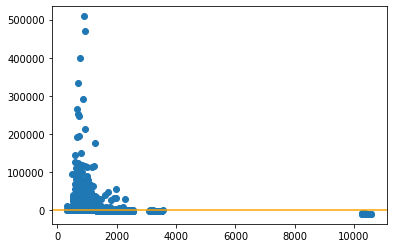

In [258]:
plt.scatter(preds, resids)
plt.axhline(y = 0, color = 'orange', linestyle = '-');

In [ ]:
# The model seemed to be high underfit, there was alot of data that was not well predicted and was very biased

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [266]:
X = df[['age']]
X = sm.add_constant(X)
y = df['tripduration']
ols = sm.OLS(y, X).fit()

/Users/josedelgadillo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


## Evaluate your model
Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [ ]:
# Alternate hypothesis: There is a statistical relationship between age and tripduration

In [ ]:
# Null hypothesis: There is not statistical relationship between age and tripduration

In [267]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     18.40
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.79e-05
Time:                        23:40:56   Log-Likelihood:            -2.1863e+06
No. Observations:              218019   AIC:                         4.373e+06
Df Residuals:                  218017   BIC:                         4.373e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        678.0189     41.268     16.430      0.000     597.135     758.902
age            4.4081      1.028      4.290      0.000       2.394       6.422
==============================================================================
Omnibus:                   747132.948   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     296686784602.053
Skew:                          64.009   Prob(JB):                         0.00
Kurtosis:                    5716.452   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# There seems to be some relationsip between trip duration and age. It is showing for every and increase of 4.4 
# minutes for every 1 year increse.

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

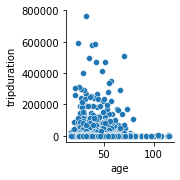

In [273]:
sns.pairplot(df, x_vars = ['age'], y_vars = ['tripduration']);

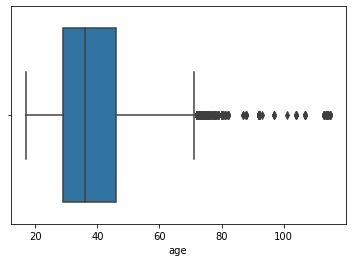

In [270]:
sns.boxplot(x = df['age']);

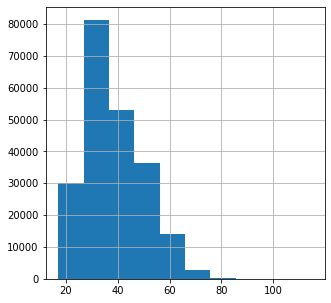

In [269]:
df['age'].hist(figsize=(5,5));

It is hard to tell from the scatter plot but the box plot and histogram show a clear increase in the average bike
ride for poeple who are over 30 and under 55~. Citibike should focus to target those age groups to market towards.